# Hands On

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
df = pd.read_csv("../00-storage/csv-store/cars_clus.csv")

df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [3]:
df.shape

(159, 16)

# Data Cleaning

Let's clean the dataset by dropping the rows that have null value:

In [4]:
df[[
    'sales',
    'resale',
    'type',
    'price',
    'engine_s',
    'horsepow',
    'wheelbas',
    'width',
    'length',
    'curb_wgt',
    'fuel_cap',
    'mpg',
    'lnsales'
]] = df[[
    'sales', 
    'resale', 
    'type', 
    'price', 
    'engine_s',
    'horsepow', 
    'wheelbas', 
    'width', 
    'length', 
    'curb_wgt', 
    'fuel_cap',
    'mpg', 
    'lnsales'
]].apply(pd.to_numeric, errors="coerce")

df = df.dropna()
df = df.reset_index(drop=True)

df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [5]:
print("Shape of dataset after cleaning: ", df.shape)

Shape of dataset after cleaning:  (117, 16)


# Adding KM/L 

In [6]:
df["kml"] = 236.25/df["mpg"]
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636


In [7]:
print("Shape of dataset after cleaning: ", df.shape)

Shape of dataset after cleaning:  (117, 17)


# Feature Selection

In [8]:
featureset = df[[
    'engine_s',
    'horsepow',
    'wheelbas',
    'width',
    'length',
    'curb_wgt',
    'fuel_cap',
    'mpg',
    "kml"
]]
featureset[0:5]

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,kml
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,8.437500
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,9.450000
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,10.738636
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,8.750000
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,10.738636


# Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
x = featureset.values # return a numpy array(isn't pandas now)
x

array([[  1.8       , 140.        , 101.2       , ...,  13.2       ,
         28.        ,   8.4375    ],
       [  3.2       , 225.        , 108.1       , ...,  17.2       ,
         25.        ,   9.45      ],
       [  3.5       , 210.        , 114.6       , ...,  18.        ,
         22.        ,  10.73863636],
       ...,
       [  1.8       , 150.        , 106.4       , ...,  16.4       ,
         27.        ,   8.75      ],
       [  2.        , 115.        ,  97.4       , ...,  13.7       ,
         26.        ,   9.08653846],
       [  2.        , 115.        ,  98.9       , ...,  14.6       ,
         26.        ,   9.08653846]])

In [11]:
min_max_scaler = MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [12]:
feature_mtx = min_max_scaler.fit_transform(x) # 0 U 1
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.52272727]])

# Clustering using **Scipy**

First, we calculate the distance matrix.

In [13]:
import scipy

leng = feature_mtx.shape[0]
leng

117

In [14]:
Dis = np.zeros([leng, leng]) 
print(Dis)
print(Dis.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(117, 117)


In [15]:
for i in range(leng): 
    for j in range(leng):
        Dis[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Dis

array([[0.        , 0.585763  , 0.78573911, ..., 0.28685109, 0.25672507,
        0.19866125],
       [0.585763  , 0.        , 0.25892304, ..., 0.36698373, 0.66436916,
        0.62297526],
       [0.78573911, 0.25892304, 0.        , ..., 0.55085974, 0.83285848,
        0.79502645],
       ...,
       [0.28685109, 0.36698373, 0.55085974, ..., 0.        , 0.41920634,
        0.35863999],
       [0.25672507, 0.66436916, 0.83285848, ..., 0.41920634, 0.        ,
        0.15212198],
       [0.19866125, 0.62297526, 0.79502645, ..., 0.35863999, 0.15212198,
        0.        ]])

Actually, it calculated the distance manually, rather than using the library's functions

The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid <br/>
We use complete for our case, but feel free to change it to see how the results change.

In [16]:
import pylab 
import scipy.cluster.hierarchy
method = "complete"

DisCondensed = squareform(Dis)

z = hierarchy.linkage(DisCondensed, method)

print(z.shape)
print("\n")
print(z[0])
print("\n")
print(z[58])
print("\n")
print(z[-1])

(116, 4)


[3.60000000e+01 9.20000000e+01 1.55279503e-03 2.00000000e+00]


[ 38.         124.           0.19818346   3.        ]


[230.         231.           2.49780013 117.        ]


**Using Cutting Line**: In some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [17]:
from scipy.cluster.hierarchy import fcluster

In [18]:
max_d = 3
clusters = fcluster(z, max_d, criterion="distance")
print(clusters.shape)
print("\n")
print(clusters)

(117,)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


Also, you can determine the number of clusters directly:

In [19]:
k = 5
clusters = fcluster(z, k, criterion='maxclust')
clusters

array([1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 3, 1,
       2, 1, 1, 5, 1, 5, 1, 1, 1, 3, 4, 4, 4, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       4, 5, 4, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 5, 1, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 3, 1, 1, 5, 5, 5, 1, 5,
       5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1], dtype=int32)

Now, plot the dendrogram:

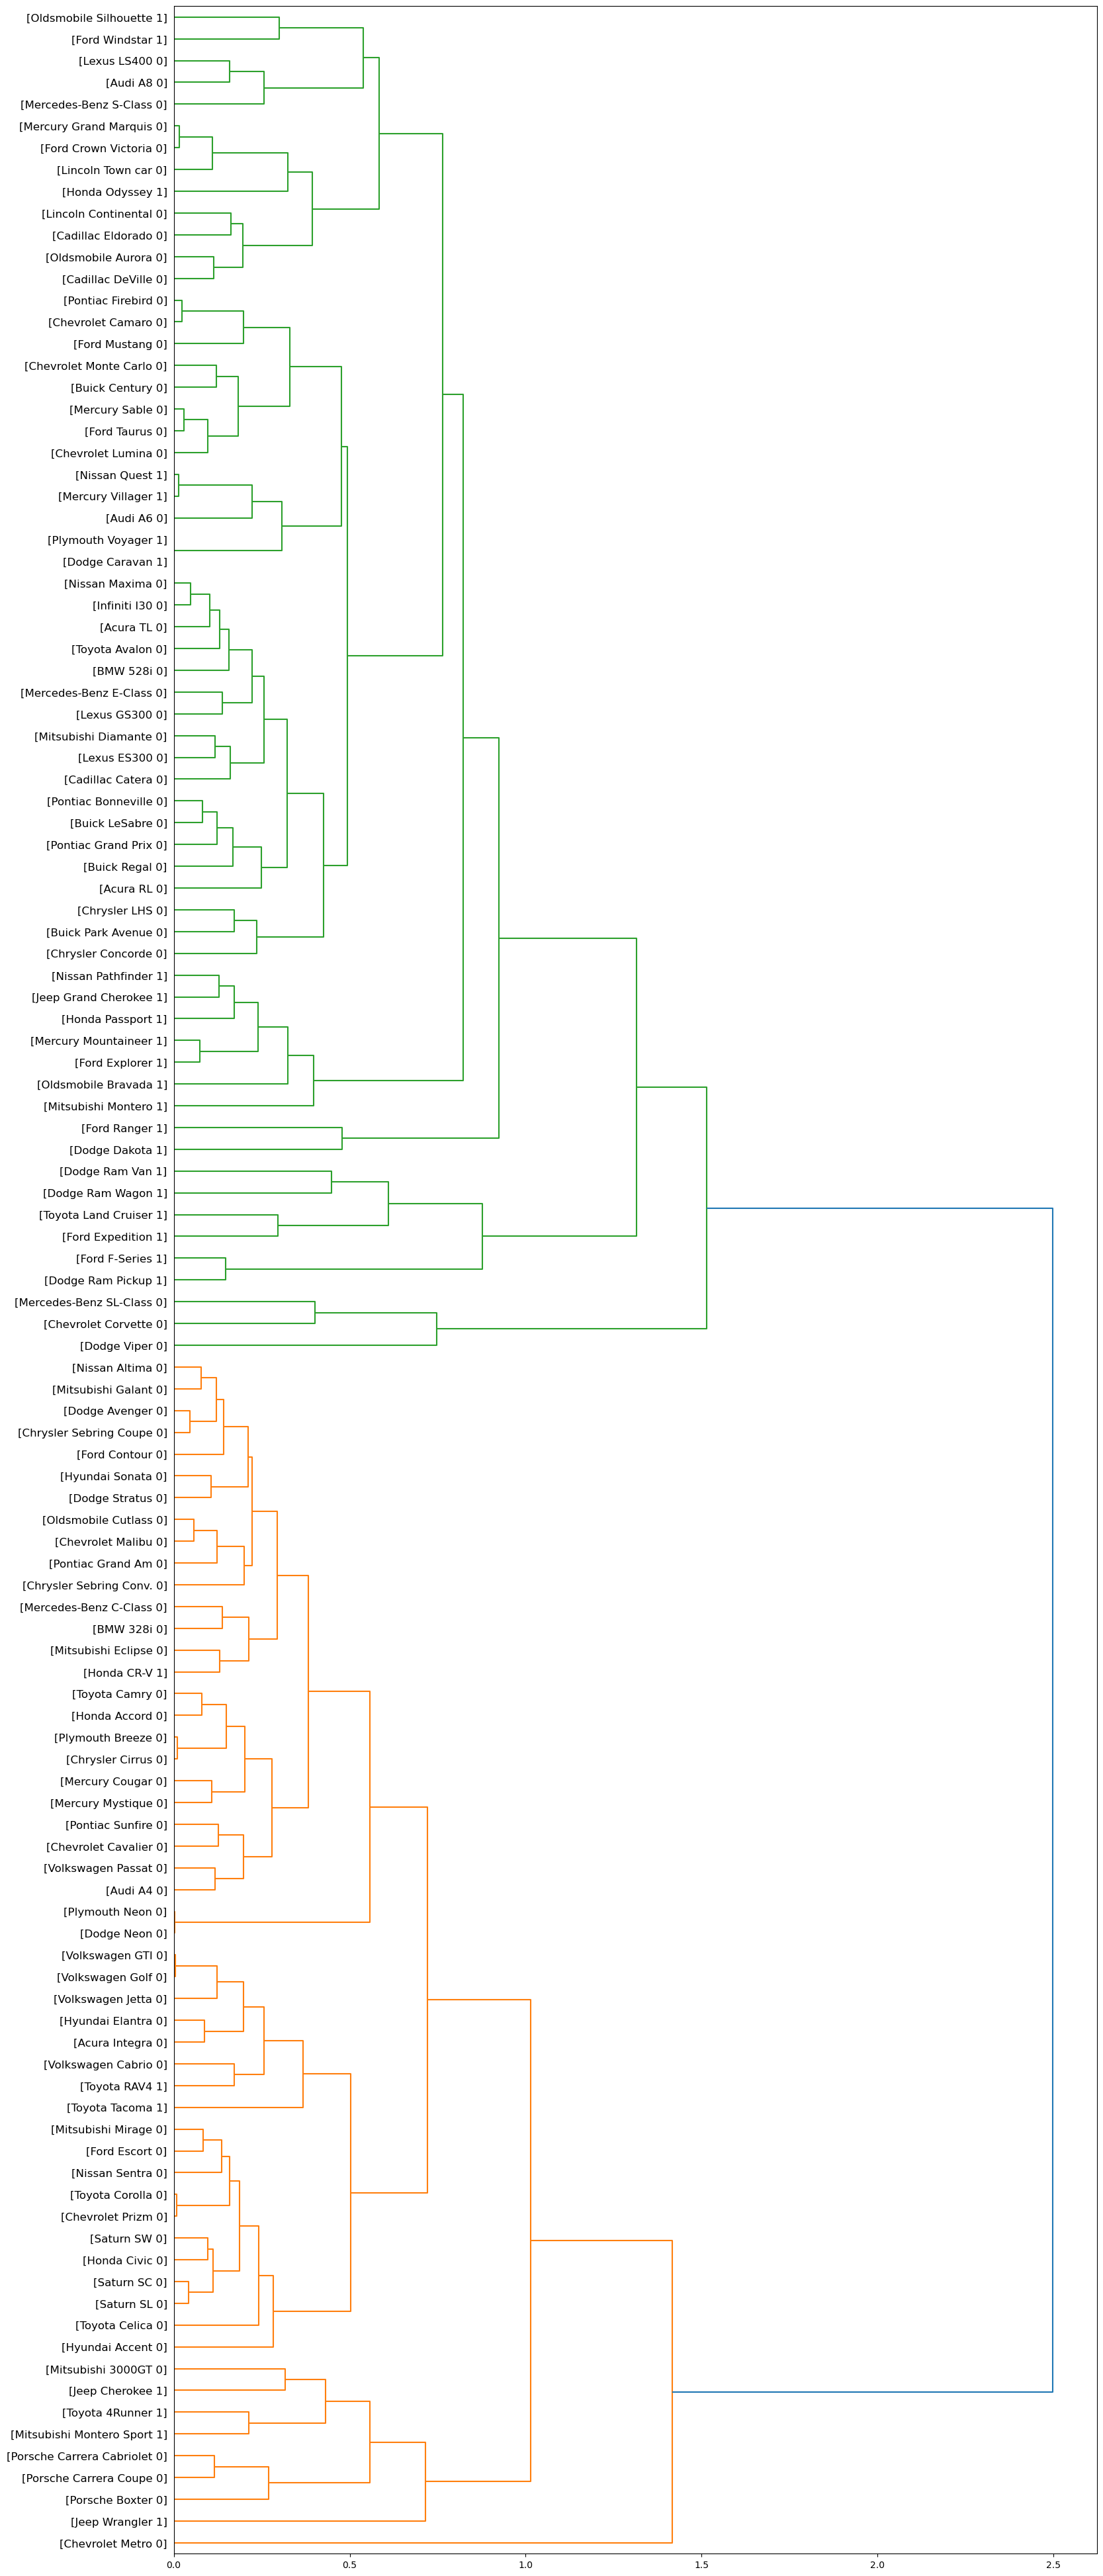

In [20]:
fig = pylab.figure(figsize=(18, 50))

def llf(id):
    return '[%s %s %s]' % (df["manufact"][id], df["model"][id], int(float(df["type"][id])))

dendro = hierarchy.dendrogram(z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation = "right")

plt.show()

# Clustering using **scikit-learn**

Let's redo it again, but this time using the scikit-learn package:

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.585763   0.78573911 ... 0.28685109 0.25672507 0.19866125]
 [0.585763   0.         0.25892304 ... 0.36698373 0.66436916 0.62297526]
 [0.78573911 0.25892304 0.         ... 0.55085974 0.83285848 0.79502645]
 ...
 [0.28685109 0.36698373 0.55085974 ... 0.         0.41920634 0.35863999]
 [0.25672507 0.66436916 0.83285848 ... 0.41920634 0.         0.15212198]
 [0.19866125 0.62297526 0.79502645 ... 0.35863999 0.15212198 0.        ]]


In [22]:
z_using_dist_matrix = hierarchy.linkage(dist_matrix, "complete")
z_using_dist_matrix

C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\1712244724.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_using_dist_matrix = hierarchy.linkage(dist_matrix, "complete")


array([[3.60000000e+01, 9.20000000e+01, 5.11797212e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.05849614e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.15246549e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.04575118e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 4.85268076e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.32431038e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 6.88550131e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.34410543e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.42476098e-01, 2.00000000e+00],
       [1.01000000e+02, 1.02000000e+02, 1.60307113e-01, 2.00000000e+00],
       [1.60000000e+01, 8.60000000e+01, 1.61791946e-01, 2.00000000e+00],
       [1.00000000e+00, 5.50000000e+01, 2.05387891e-01, 2.00000000e+00],
       [1.10000000e+01, 9.70000000e+01, 2.42178974e-01, 2.00000000e+00],
       [4.80000000e+01, 1.05000000e+02, 2.44188877e

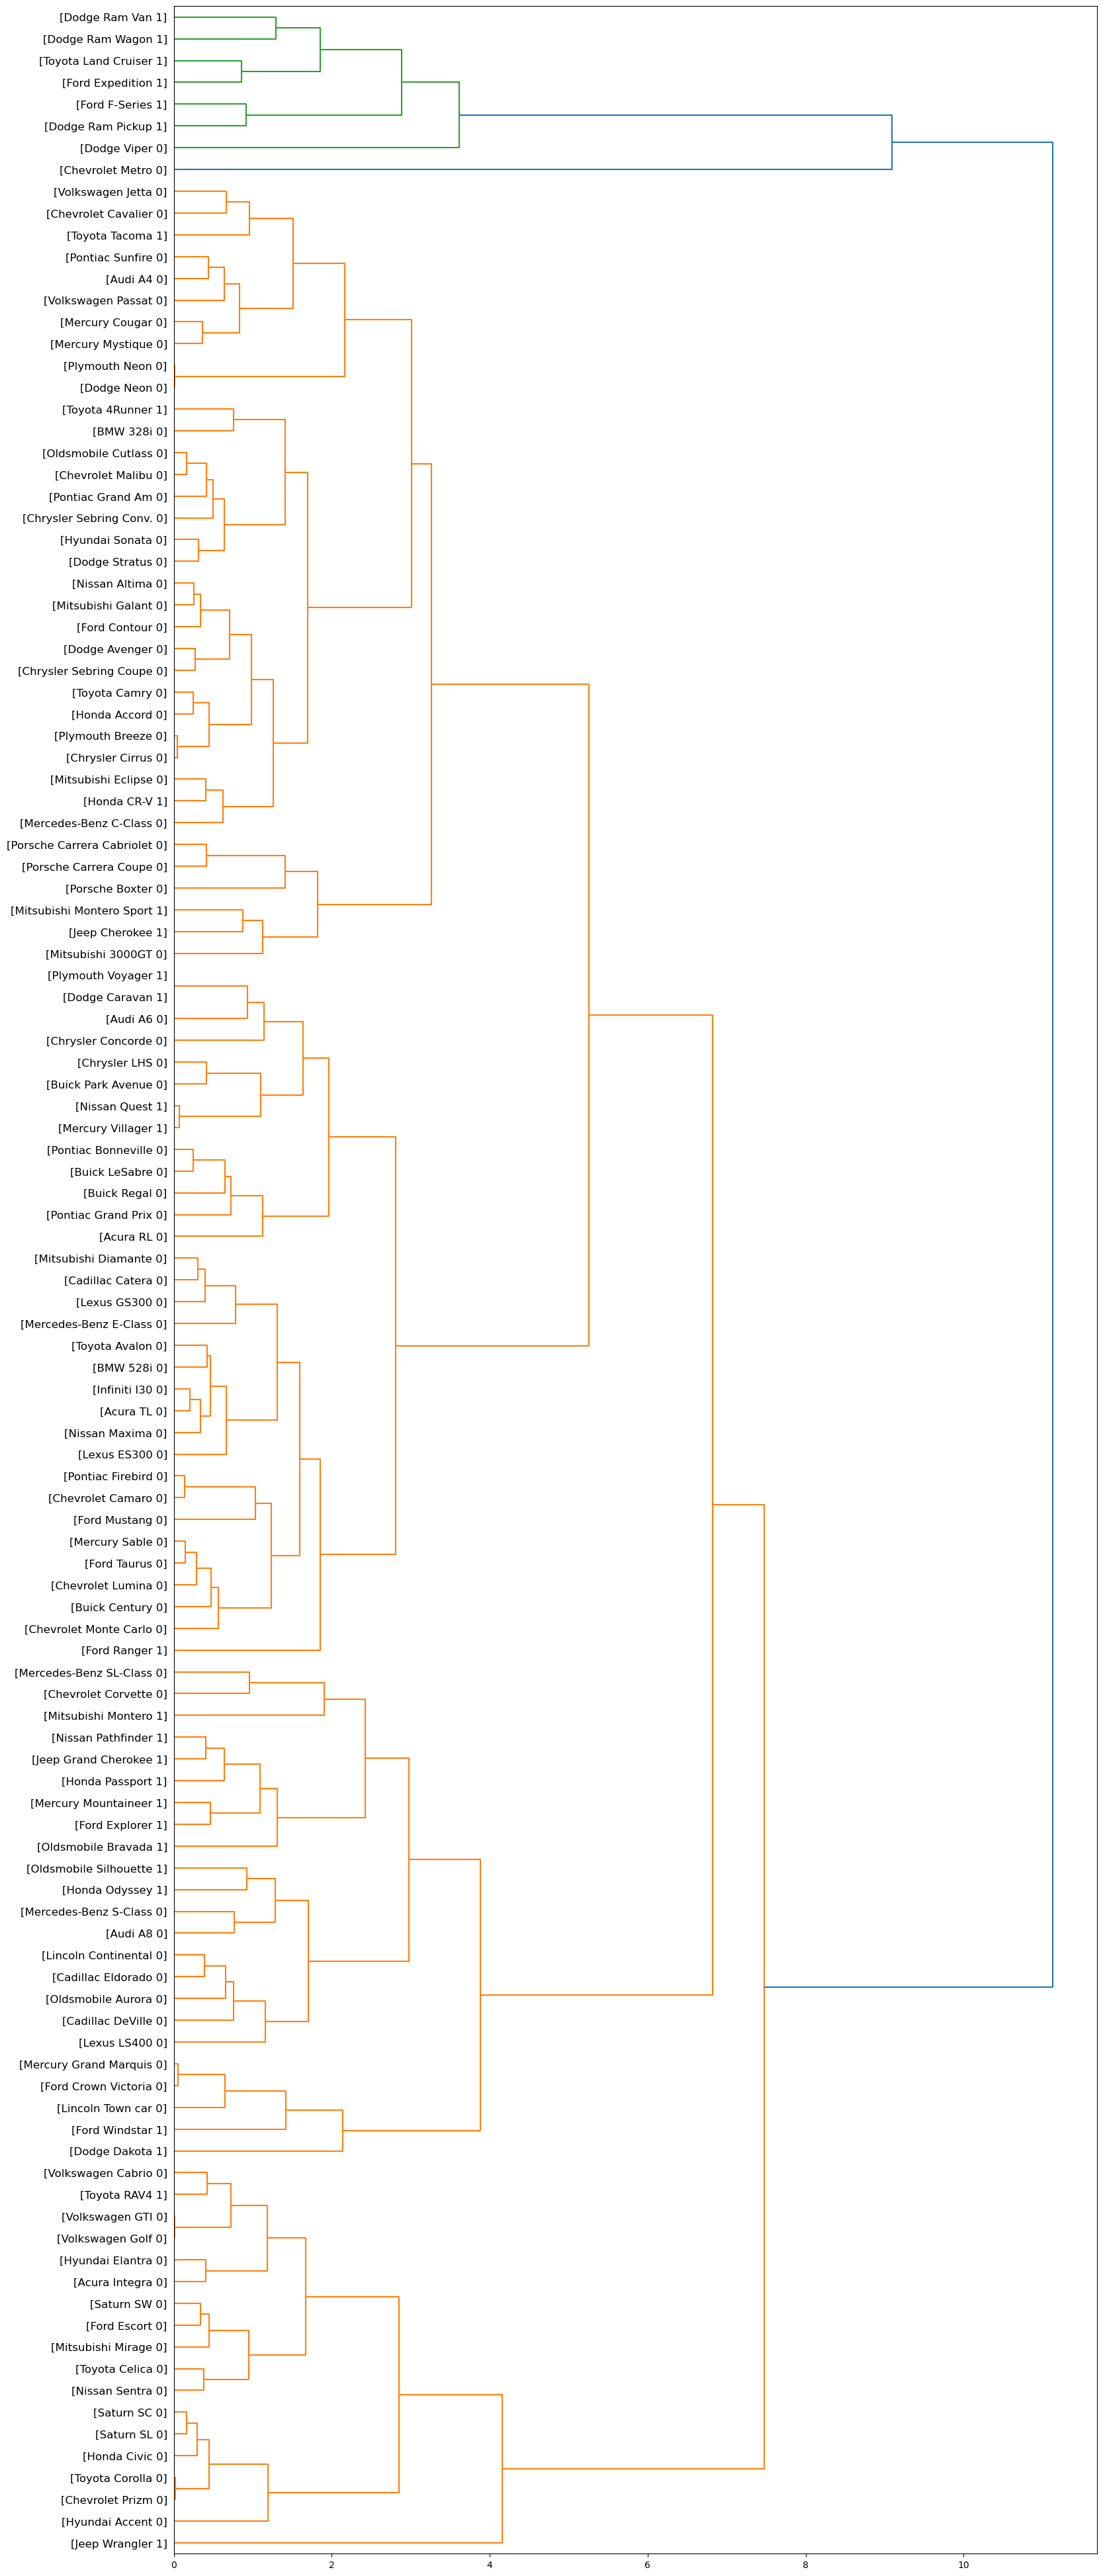

In [23]:
fig = pylab.figure(figsize=(18,50))

def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.show()

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. 

In [24]:
agglom = AgglomerativeClustering(n_clusters=6, linkage="complete")
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\GIGA\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 1, 0,
       5, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 1, 2, 0, 2, 4, 2, 1, 1, 1,
       3, 2, 3, 0, 4, 4, 1, 1, 0, 0, 4, 2, 0, 4, 1, 2, 2, 1, 1, 1, 0, 4,
       4, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 2, 1, 1, 0, 4, 2, 2, 1, 4, 1,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 4, 2, 0, 4, 0,
       4, 3, 0, 4, 4, 0, 0])

In [25]:
df["cluster_"] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


In [26]:
import matplotlib.cm as cm

C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\1884915110.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5) # s=size


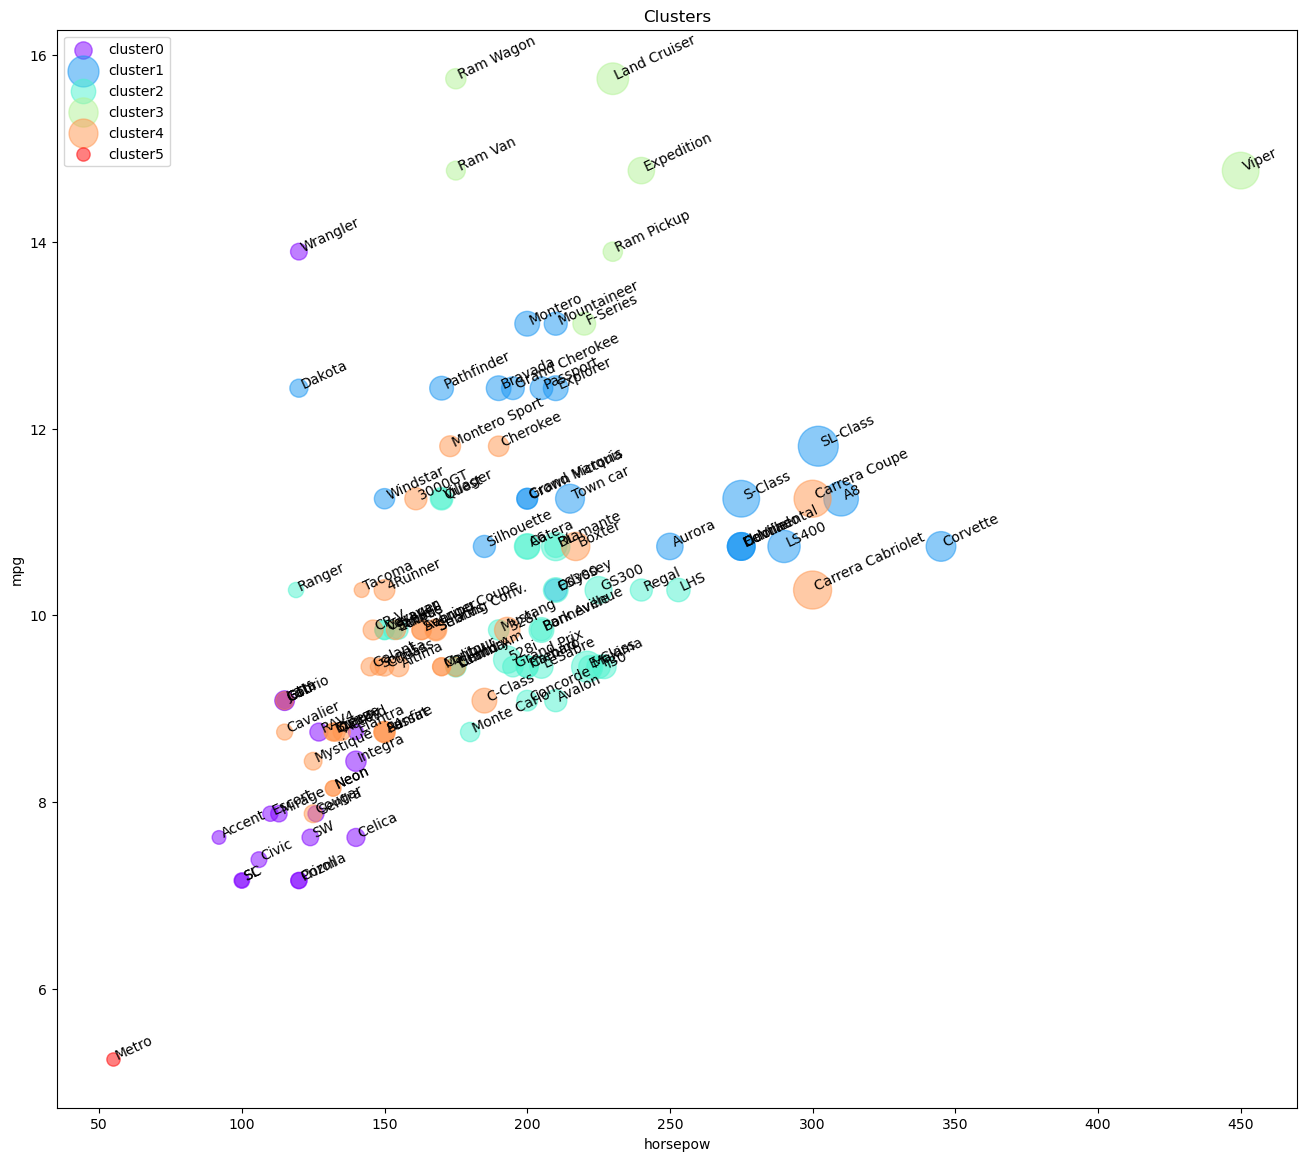

In [27]:
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# colors
cluster_labels = list(range(0, n_clusters))
# cluster_labels => [0, 1, 2, 3, 4, 5]

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset=df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.kml[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.kml, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5) # s=size

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

plt.show()

After plotting, it is not very clear where is the centroid of each cluster. <br/>
Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column).<br/>
So, we use them to distinguish the classes, and summarize the cluster.<br/>
First we count the number of cases in each group:

In [28]:
df.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type
0         0.0     16
          1.0      2
1         0.0     12
          1.0     11
2         0.0     27
          1.0      5
3         0.0      1
          1.0      6
4         0.0     31
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

Now we can look at the characteristics of each cluster:

In [29]:
agg_cars = df.groupby(['cluster_','type'])[['horsepow','engine_s','kml','price']].mean()
agg_cars

horsepow  engine_s        kml      price
cluster_ type                                            
0        0.0   117.250000  1.850000   7.934637  14.330125
         1.0   123.500000  2.250000  11.323529  15.674000
1        0.0   267.666667  4.566667  11.041193  46.417417
         1.0   185.909091  3.518182  12.101422  26.856727
2        0.0   203.111111  3.303704   9.785538  27.750593
         1.0   151.800000  2.780000  10.491848  19.874800
3        0.0   450.000000  8.000000  14.765625  69.725000
         1.0   211.666667  4.483333  14.675551  29.024667
4        0.0   161.645161  2.451613   9.338760  23.390516
         1.0   160.200000  2.820000  10.802446  19.702600
5        0.0    55.000000  1.000000   5.250000   9.235000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

*   Cluster 1: with almost high kml, and low in horsepower.

*   Cluster 2: with good kml and horsepower, but higher price than average.

*   Cluster 3: with low kml, high horsepower, highest price.

**Trucks**:

*   Cluster 1: with almost highest kml among trucks, and lowest in horsepower and price.
*   Cluster 2: with almost low kml and medium horsepower, but higher price than average.
*   Cluster 3: with good kml and horsepower, low price.

Please notice that we did not use **type**  and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy.

In [30]:
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    # print(subset.index)
    print(subset)

      horsepow  engine_s        kml      price
type                                          
0.0     117.25      1.85   7.934637  14.330125
1.0     123.50      2.25  11.323529  15.674000
        horsepow  engine_s        kml      price
type                                            
0.0   267.666667  4.566667  11.041193  46.417417
1.0   185.909091  3.518182  12.101422  26.856727
        horsepow  engine_s        kml      price
type                                            
0.0   203.111111  3.303704   9.785538  27.750593
1.0   151.800000  2.780000  10.491848  19.874800
        horsepow  engine_s        kml      price
type                                            
0.0   450.000000  8.000000  14.765625  69.725000
1.0   211.666667  4.483333  14.675551  29.024667
        horsepow  engine_s        kml      price
type                                            
0.0   161.645161  2.451613   9.338760  23.390516
1.0   160.200000  2.820000  10.802446  19.702600
      horsepow  engine_s   k

In [31]:
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        print("index:", i)
        print("horsepow:" , subset.loc[i][0])
        print("kml:", subset.loc[i][2])
        print("price", subset.loc[i][3])
        print("-------------------------------------")

index: 0.0
horsepow: 117.25
kml: 7.934637171674092
price 14.330125
-------------------------------------
index: 1.0
horsepow: 123.5
kml: 11.323529411764707
price 15.674000000000001
-------------------------------------
index: 0.0
horsepow: 267.6666666666667
kml: 11.041193181818182
price 46.41741666666667
-------------------------------------
index: 1.0
horsepow: 185.9090909090909
kml: 12.101421695633263
price 26.85672727272727
-------------------------------------
index: 0.0
horsepow: 203.11111111111111
kml: 9.785538465806699
price 27.750592592592593
-------------------------------------
index: 1.0
horsepow: 151.8
kml: 10.491847826086957
price 19.8748
-------------------------------------
index: 0.0
horsepow: 450.0
kml: 14.765625
price 69.725
-------------------------------------
index: 1.0
horsepow: 211.66666666666666
kml: 14.675551470588234
price 29.024666666666665
-------------------------------------
index: 0.0
horsepow: 161.6451612903226
kml: 9.338759866626578
price 23.39051612903

C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\159964841.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("horsepow:" , subset.loc[i][0])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\159964841.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("kml:", subset.loc[i][2])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\159964841.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("price", subset.loc[i][3])


C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\3376758244.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
C:\Users\GIGA\AppData\Local\Temp\ipykernel_4488\3376758244.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))


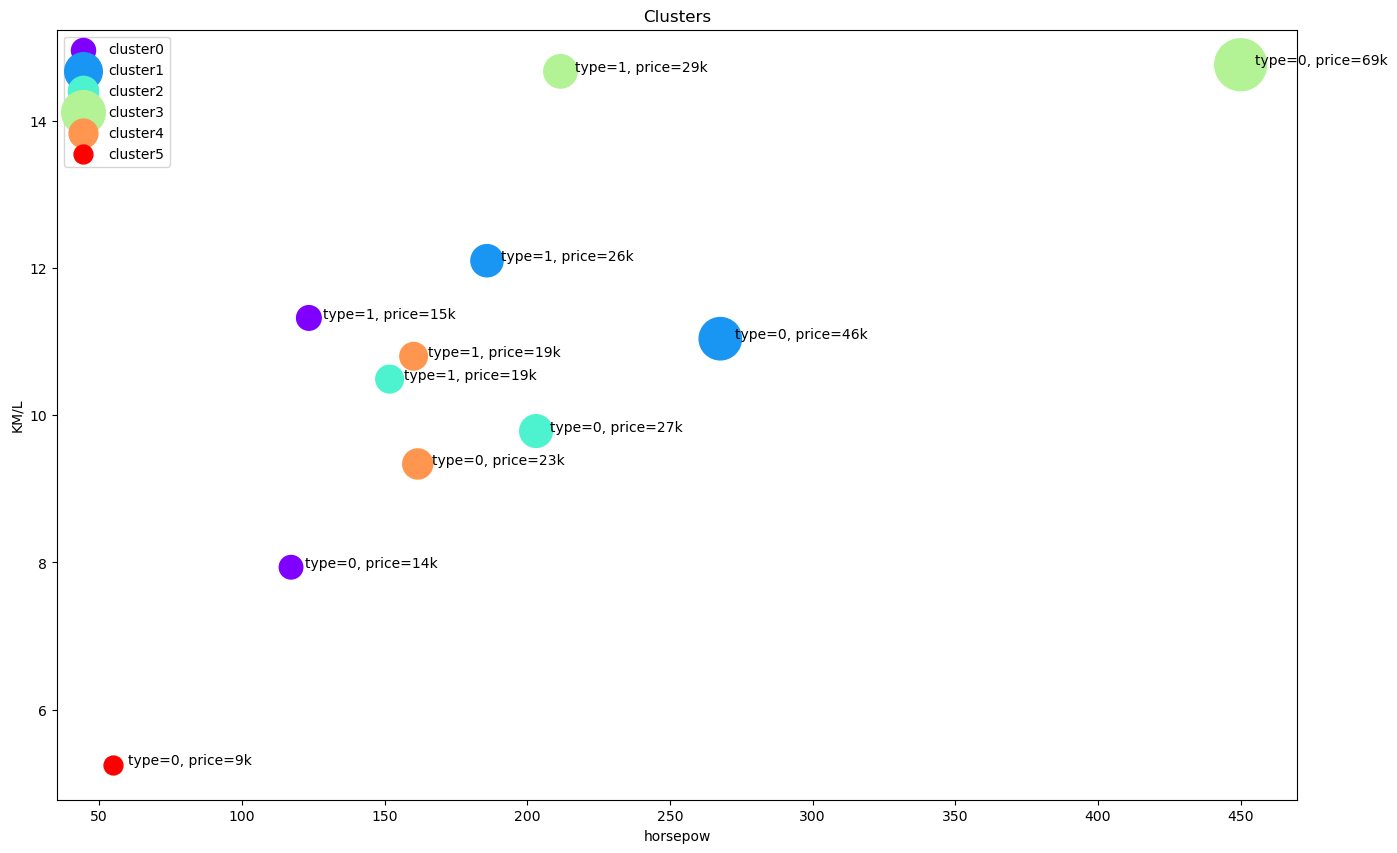

In [35]:
plt.figure(figsize=(16,10))

for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        # if i == 1:
        #     continue
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('KM/L')

plt.show()